In [2]:
# Import libraries:
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.animation import FuncAnimation
import matplotlib.cm as cm
from matplotlib.colors import Normalize

# Number of detectors:
det_num = 1302

# RF period (325 MHz frequency):
T = 1/(325*10**6)*10**9 # ns

# Figure directory:
dir = "Figures/"

In [ ]:
# Values for all detectors:
x_vals = []; y_vals = []; z_vals = []
px_vals = []; py_vals = []; pz_vals = []
t_vals = []; position = []
for j in range(det_num):

    # Load data from output txt files:
    data = np.loadtxt('out'+str(j+1)+'.txt')

    # Values for each detector:
    x = []; y = []; z = []
    px = []; py = []; pz = []
    t = []
    for i in range(data.shape[0]):
        x.append(data[i][0]*0.1) # mm -> cm
        y.append(data[i][1]*0.1)
        z.append(data[i][2]*0.1)
        px.append(data[i][3]) # MeV/c
        py.append(data[i][4])
        pz.append(data[i][5])
        t.append(data[i][6]) # ns

    if len(x) != 0:

        # Values for entire channel:
        x_vals.append(x)
        y_vals.append(y)
        z_vals.append(z)
        px_vals.append(px)
        py_vals.append(py)
        pz_vals.append(pz)
        t_vals.append(t)
        position.append(z[0]/100) # cm -> m

# Takes ~16 minutes to run

/var/folders/d1/72_2xzds6lz0krc7zdw_94_m0000gp/T/ipykernel_25583/3545371533.py:8: UserWarning: loadtxt: input contained no data: "out1.txt"
  data = np.loadtxt('out'+str(j+1)+'.txt')
/var/folders/d1/72_2xzds6lz0krc7zdw_94_m0000gp/T/ipykernel_25583/3545371533.py:8: UserWarning: loadtxt: input contained no data: "out2.txt"
  data = np.loadtxt('out'+str(j+1)+'.txt')
/var/folders/d1/72_2xzds6lz0krc7zdw_94_m0000gp/T/ipykernel_25583/3545371533.py:8: UserWarning: loadtxt: input contained no data: "out3.txt"
  data = np.loadtxt('out'+str(j+1)+'.txt')
/var/folders/d1/72_2xzds6lz0krc7zdw_94_m0000gp/T/ipykernel_25583/3545371533.py:8: UserWarning: loadtxt: input contained no data: "out4.txt"
  data = np.loadtxt('out'+str(j+1)+'.txt')
/var/folders/d1/72_2xzds6lz0krc7zdw_94_m0000gp/T/ipykernel_25583/3545371533.py:8: UserWarning: loadtxt: input contained no data: "out5.txt"
  data = np.loadtxt('out'+str(j+1)+'.txt')
/var/folders/d1/72_2xzds6lz0krc7zdw_94_m0000gp/T/ipykernel_25583/3545371533.py:8: Use

In [4]:
# Find center of distribution at each detector:
x_centers = []
y_centers = []
for i in range(len(x_vals)):
    x_center = np.mean(x_vals[i])
    y_center = np.mean(y_vals[i])
    print(x_center, y_center)
    x_centers.append(x_center)
    y_centers.append(y_center)

-0.750321923 -0.7108905018999999
0.014602486399999974 0.37550204200000004
-0.04408500080000002 0.5853073150000001
0.7780629350000001 0.635053831
0.685992187 0.557493217
-0.31407266599999994 -0.23304703700000007
-0.328845937 -0.462359772694
-1.0746371505050507 0.11114783636363634
-0.9590293101010101 0.1831461295959597
-0.01992384343434348 0.5207894494949495
-0.03810212121212127 0.8420938980000001
1.1883851030612245 0.11771350540816325
1.0730126561224491 0.08845876463265298
0.5510976530612246 0.6827370775510204
0.40928369897959194 0.6794389015306121
-0.7009123820833333 -0.43509285156249994
-0.4572527756756758 2.761762464864865
-0.00027014863157880315 -1.5198830547368423
-2.632216046153846 -2.1894807134615384
-0.9181722849462366 -0.2906921119354839
1.4274276093023257 -2.173627876744186
-0.61916417 0.6701557777777778
0.8740726521276596 2.846428231914894
0.9977121681818182 0.4248042613636364
-2.742642208823529 -0.5316541794117647
0.9117745197530863 0.3224351851851851
2.37572475 -2.142890637

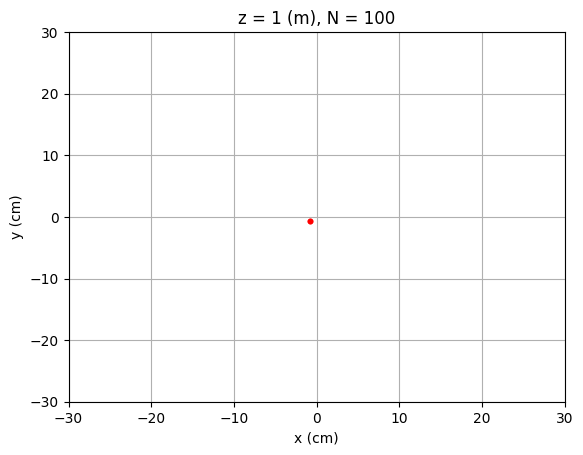

In [5]:
# Animated plot of center of distribution with path:
fig = plt.figure()
cmap = plt.get_cmap('coolwarm')
def animate(frame):
    plt.clf()
    plt.scatter(x_centers[frame], y_centers[frame], color='red', label='Center',zorder=5,s=10)
    # plt.plot(x_centers[:frame+1],y_centers[:frame+1],color='grey',linewidth=1)
    for i in range(frame):
        color = cmap(i/len(position))
        plt.plot(x_centers[(i-1):(i+2)],y_centers[(i-1):(i+2)],color=color,linewidth=1)
    plt.xlim(-30,30)
    plt.ylim(-30,30)
    plt.xlabel('x (cm)')
    plt.ylabel('y (cm)')
    plt.title('z = '+str(round(position[frame]))+' (m), N = '+str(len(x_vals[frame])))
    plt.grid()
    plt.scatter(x_centers[frame], y_centers[frame], color='red', label='Center',zorder=5,s=10)
animation = FuncAnimation(fig, animate, frames=len(x_vals), interval=500, repeat=True)
animation.save(dir+'center_distribution_animation_channel_with_path.gif', writer='pillow')

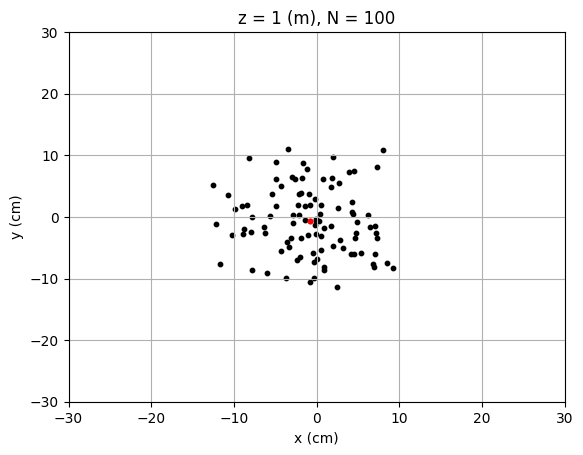

In [6]:
# Animated plot of entire distribution:
fig = plt.figure()
def animate(frame):
    plt.clf()
    plt.scatter(x_vals[frame], y_vals[frame], color='black',s=10)
    plt.scatter(x_centers[frame], y_centers[frame], color='red', label='Center',zorder=5,s=10)
    plt.xlim(-30,30)
    plt.ylim(-30,30)
    plt.xlabel('x (cm)')
    plt.ylabel('y (cm)')
    plt.title('z = '+str(round(position[frame]))+' (m), N = '+str(len(x_vals[frame])))
    plt.grid()
    plt.scatter(x_centers[frame], y_centers[frame], color='red', label='Center',zorder=5,s=10)
animation = FuncAnimation(fig, animate, frames=len(x_vals), interval=500, repeat=True)
animation.save(dir+'scatter_animation_channel.gif', writer='pillow')

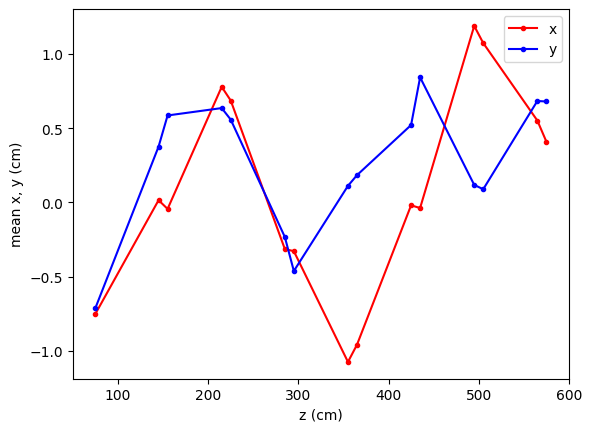

In [13]:
# Plot mean x, y along z:
# plt.plot([np.mean(i) for i in z_vals],[np.mean(i) for i in x_vals],marker='.',color='red',label='x')
# plt.plot([np.mean(i) for i in z_vals],[np.mean(i) for i in y_vals],marker='.',color='blue',label='y')
val = 15
plt.plot([np.mean(i) for i in z_vals[:val]],[np.mean(i) for i in x_vals[:val]],marker='.',color='red',label='x')
plt.plot([np.mean(i) for i in z_vals[:val]],[np.mean(i) for i in y_vals[:val]],marker='.',color='blue',label='y')
plt.xlabel('z (cm)')
plt.ylabel('mean x, y (cm)')
plt.legend()

Text(0, 0.5, 'mean y (cm)')

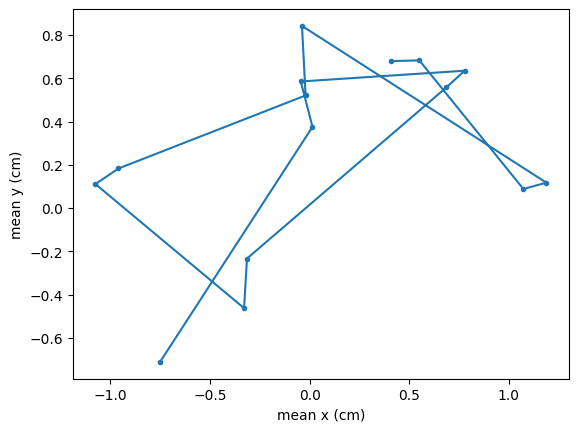

In [14]:
# Plot mean position in x, y plane:
plt.plot([np.mean(i) for i in x_vals[:val]],[np.mean(i) for i in y_vals[:val]],marker='.')
plt.xlabel('mean x (cm)')
plt.ylabel('mean y (cm)')